# Introduction to Tensorflow times a million

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
xs = np.linspace(0., 8., 800000)
ys = 0.3*xs-0.8 + np.random.normal(scale=.25, size=len(xs))

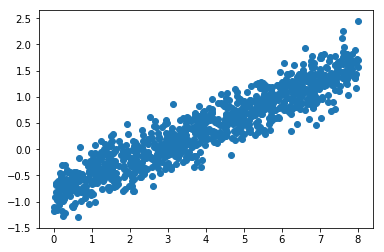

In [3]:
fig, ax = plt.subplots()
data_subset = pd.DataFrame(list(zip(xs, ys)), columns=['x', 'y']).sample(n=1000)
_ = ax.scatter(data_subset.x, data_subset.y)

#### Define variables

In [4]:
m = tf.Variable(-0.5)
b = tf.Variable(1.0)

In [5]:
batch_size = 8


#### Define placeholders

In [6]:
xs_placeholder = tf.placeholder(tf.float32, [batch_size])
ys_placeholder = tf.placeholder(tf.float32, [batch_size])

#### Define graph

In [7]:
ys_model = m*xs_placeholder+b
total_error = tf.reduce_sum((ys_placeholder-ys_model)**2)

In [8]:
optimizer_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(total_error)

In [9]:
initializer_op = tf.global_variables_initializer()

#### Build sampling graphs 

In [10]:
with tf.Session() as session:
    session.run(initializer_op)
    
    n_batches = 1000
    for i in range(n_batches):
        random_indices = np.random.randint(len(xs), size=batch_size)
        
        feed = {
            xs_placeholder: xs[random_indices],
            ys_placeholder: ys[random_indices]
        }
        session.run(optimizer_op, feed_dict=feed)
        
    slope, intercept = session.run([m, b])

In [11]:
slope

0.28637913

In [12]:
intercept

-0.7671032